## Python Notebook

These are interatcive cells which can be executed independently. This gives us greater freedom and flexibility to work. 
In addition to writing code we can also write some nmarkup code like this notebook.


The jupyter notebook can be installed via a simple pip command
```
pip install jupyter 
```

For running the notebook simply issue the command
```
jupyter notebook
```
from the terminal.
<div class="alert alert-block alert-warning">
Make sure that you check which directory you are working from and invoking the jupyter notebook.
</div>

The above command will open the jupyter home in your web browser.


## Shortcuts

+ To run a cell use `ctrl+ enter`
+ To run the current cell and move create a new cell use `shift+enter`
+ To move between cells press `escape` and use arrow keys.


## More Information

To learn more about the notebook please visit the following link.

+ [Very useful Video](https://www.youtube.com/watch?v=2eCHD6f_phE&list=PLIivdWyY5sqJxnwJhe3etaK7utrBiPBQ2)
+ [Youtube Video](https://www.youtube.com/watch?v=HW29067qVWk)

## Classifiers using sklearn

__sklearn__ is a popular python based Machine learning library. It has a common format where we create a model object like `SVM`, `Decision Tree`, `GMM` etc and then fit the data over the model using a `fit()` function. For predictions as well we have uniform methods like `predict()` and `predict_proba()` across the models.
Many deep learning libraries are inspired from the design of __sklearn__

## Common Tasks

A particular ML task encompasses a few steps:
1. Import The Dependencies
2. Load the data
3. Split it into train, test and validation sets
4. An optional plotting to visualize the data.
5. Create the ML model object like `SVM`, `DecisionTree` etc by calling the constructor
6. Fitting the data by calling the `fit()` function on the training data
7. Evaluate the model on the validation data.
8. Repeat `6` and `7` till a better result is achieved.
9. Evaluate on the test data and report the results.

Below we will do all these tasks on different classifiers.

In [ ]:
## Step 1: Import the dependencies
The packages to be used will be imported here.braries Needed Throught out 

## Importing the Necessary Libraries Needed Throught out 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import ListedColormap
from sklearn import mixture
import sklearn
from matplotlib.colors import LogNorm

### To be used in plots

In [2]:
cmap_1 = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF']) # To be used in plots
cmap_2 = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
cmap_3= ListedColormap(['#FFFF00', '#80FF0F', '#0000FF'])
cmap_4=ListedColormap(['red', 'blue', 'cyan'])

#### Initialization

In [24]:
Nc=2 # Number of class
NGMM_comp= 10  # Number of components for GMM

y=[]
Y=np.empty([0,1])
X=np.empty([0,2])

## Importing the dataset 

In [26]:
d=int(input('Enter choice for data: 1)LS 2)Interlock 3)Ring 4)Spiral \n'))

if d==1:
    path="data/LS_Group2/"
elif d==2:
    path="data/interlock/"
elif d==3:
    path="data/ring/"
else:
    path="data/spiral/"

for i in range(0,Nc):
    Xx=pd.read_csv(path+"Class"+str(i+1)+".txt",header = None, delimiter=' ', usecols=(0, 1))
    Xx=np.array(Xx)
  
    m,n=Xx.shape
    y=i*np.ones((m,1))    
    X=np.concatenate((X,Xx))
    Y=np.concatenate((Y,y))

Enter choice for data: 1)LS 2)Interlock 3)Ring 4)Spiral 
3


### Visualizing The Input Data

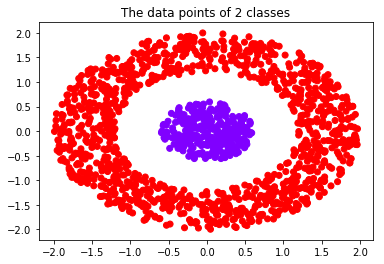

In [27]:
plt.figure()
plt.scatter(X[:,0],X[:,1], c=Y.ravel(), cmap='rainbow')
plt.title("The data points of 2 classes")
plt.show()

#### Get Input From User

In [8]:
NGMM_comp=int(input('Enter the number of mixture components to be used in each Gaussian: \n'))

Cov_type=int(input('Enter the Covariance type to be used:\n 1)full=each component has its own general covariance matrix\n 2)tied=all components share the same general covariance matrix \n 3)diag=each component has its own diagonal covariance m,atrix \n 4)spherical=each component has its own single variance \n'))

Enter the number of mixture components to be used in each Gaussian: 
1
Enter the Covariance type to be used:
 1)full=each component has its own general covariance matrix
 2)tied=all components share the same general covariance matrix 
 3)diag=each component has its own diagonal covariance m,atrix 
 4)spherical=each component has its own single variance 
1


### Fit The Model on Training Data

In [10]:
if Cov_type==1:
    C='full'
elif Cov_type==2:
    C='tied'
elif Cov_type==3:
    C='diag'
elif Cov_type==4:
    C='spherical'
classifiers = [[] for i in range(0,Nc)]
for i in range(0,Nc):
    classifiers[i]=mixture.GaussianMixture(n_components=NGMM_comp,covariance_type=C,verbose=2,warm_start=True,tol=0.00001,verbose_interval=1)
    #'full'=each component has its own general covariance matrix
    #'tied'=all components share the same general covariance matrix
    #'diag'=each component has its own diagonal covariance m,atrix
    #'spherical'=each component has its own single variance


    Xx=pd.read_csv(path+"Class"+str(i+1)+".txt",header = None, delimiter=' ', usecols=(0, 1))
    Xx=np.array(Xx)
    classifiers[i].fit(Xx)
    
    m,n=Xx.shape
    y=i*np.ones((m,1))    
    X=np.concatenate((X,Xx))
    Y=np.concatenate((Y,y))

Initialization 0
  Iteration 1	 time lapse 0.04379s	 ll change inf
  Iteration 2	 time lapse 0.00088s	 ll change 0.00000
Initialization converged: True	 time lapse 0.04474s	 ll -4.44541
Initialization 0
  Iteration 1	 time lapse 0.00228s	 ll change inf
  Iteration 2	 time lapse 0.00101s	 ll change 0.00000
Initialization converged: True	 time lapse 0.00339s	 ll -3.95847


#### Helper Funtion

In [12]:
def classify_data(X, classifiers):
    y_pred = np.argmax([classifiers[j].score_samples(X) for j in range(0,Nc)],0)
    return y_pred

### Plotting decision regions

Text(0.5, 1.0, 'Decision region with 2 Classes using GMM')

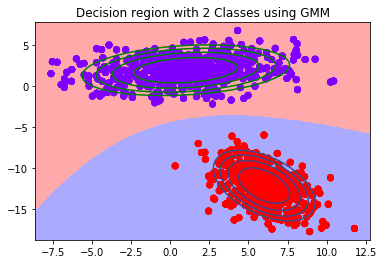

In [18]:
h = 0.05 # Grid size

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = classify_data(np.c_[xx.ravel(), yy.ravel()],classifiers)
Z = Z.reshape(xx.shape)

plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_1)
plt.scatter(X[:,0],X[:,1], c=Y.ravel(), cmap='rainbow')

x = np.linspace(float(x_min),float(x_max),2000)
y = np.linspace(float(y_min),float(y_max),2000)
X1, Y1 = np.meshgrid(x, y)
XX1 = np.array([X1.ravel(), Y1.ravel()]).T
model1=classifiers[0]
Z1 = -model1.score_samples(XX1)
Z1 = Z1.reshape(X1.shape)
CS = plt.contour(X1, Y1, Z1, norm=LogNorm(vmin=1.0, vmax=1000.0),
                 levels=np.linspace(Z1.min()-5,Z1.min()+2, 15),colors=['green'])
plt.scatter(X[:,0],X[:,1], c=Y.ravel(), cmap='rainbow')

model1=classifiers[1]
Z1 = -model1.score_samples(XX1)
Z1 = Z1.reshape(X1.shape)
#print Z1
CS = plt.contour(X1, Y1, Z1, norm=LogNorm(vmin=1.0, vmax=1000.0),
                 levels=np.linspace(Z1.min()-5,Z1.min()+2, 15))  #np.logspace(-1,0.75, 60)
plt.scatter(X[:,0],X[:,1], c=Y.ravel(), cmap='rainbow')
plt.title('Decision region with '+str(Nc)+' Classes using GMM')

### For Accuracy and Confusion Matrix

In [21]:

x_test=np.empty((0,2))
y_test=np.empty((0,1))

for i in range(0,Nc):
    
    temp=pd.read_csv(path+"Class"+str(i+1)+".txt",header = None, delimiter=' ', usecols=(0, 1))
    temp=np.array(temp)
    m,n=temp.shape
    ytemp=i*np.ones((m,1))
    x_test=np.concatenate((x_test,temp))
    y_test=np.concatenate((y_test,ytemp))
    
y_pred = classify_data(x_test, classifiers) 
conf_mat = sklearn.metrics.confusion_matrix(y_test, y_pred)
accuracy = sklearn.metrics.accuracy_score(y_test, y_pred) 
print("The confusion Matrix is")
print(conf_mat)
print("The accuracy is ")
print(accuracy*100)

The confusion Matrix is
[[500   0]
 [  0 500]]
The accuracy is 
100.0


### Plotting the test data.

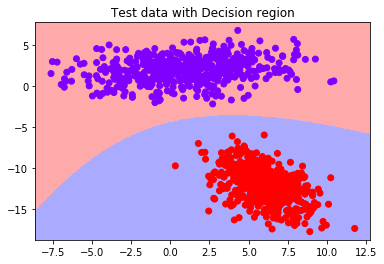

In [22]:

x1=x_test[:,0]
y1=x_test[:,1]
plt.figure(2)
plt.pcolormesh(xx, yy, Z, cmap=cmap_1)
plt.scatter(x1,y1,c=y_test.ravel(), cmap='rainbow')
plt.title('Test data with Decision region')
plt.show()